**Exercise 10.11**.  The quarterly earnings per share for 1960–1980 of the U.S. company Johnson & Johnson, are saved in the file named `JJ`.

**(a)**  Plot the time series and also the logarithm of the series.  Argue that we should transform by logs to model this series.

**(b)**  The series is clearly not stationary.  Take first differences and plot that series.  Does stationarity now seem reasonable?

**(c)**  Calculate and graph the sample ACF of the first differences.  Interpret the results.

**(d)**  Display the plot of seasonal differences and the first differences.  Interpret the plot.  Recall that for quarterly data, a season is of length 4.

**(e)**  Graph and interpret the sample ACF of seasonal differences with the first differences.

**(f)**  Fit the model ARIMA$(0,1,1)\times(0,1,1)_4$, and assess the significance of the estimated coefficients.

**(g)**  Perform all of the diagnostic tests on the residuals.

**(h)**  Calculate and plot forecasts for the next two years of the series.  Be sure to include forecast limits.

**Solution**.

In [1]:
require(ggplot2)
require(latex2exp)
require(data.table)

Loading required package: ggplot2

Loading required package: latex2exp

Loading required package: data.table



In [2]:
Y <- read.csv('../data/JJ.dat')[['JJ']]

**(a)**

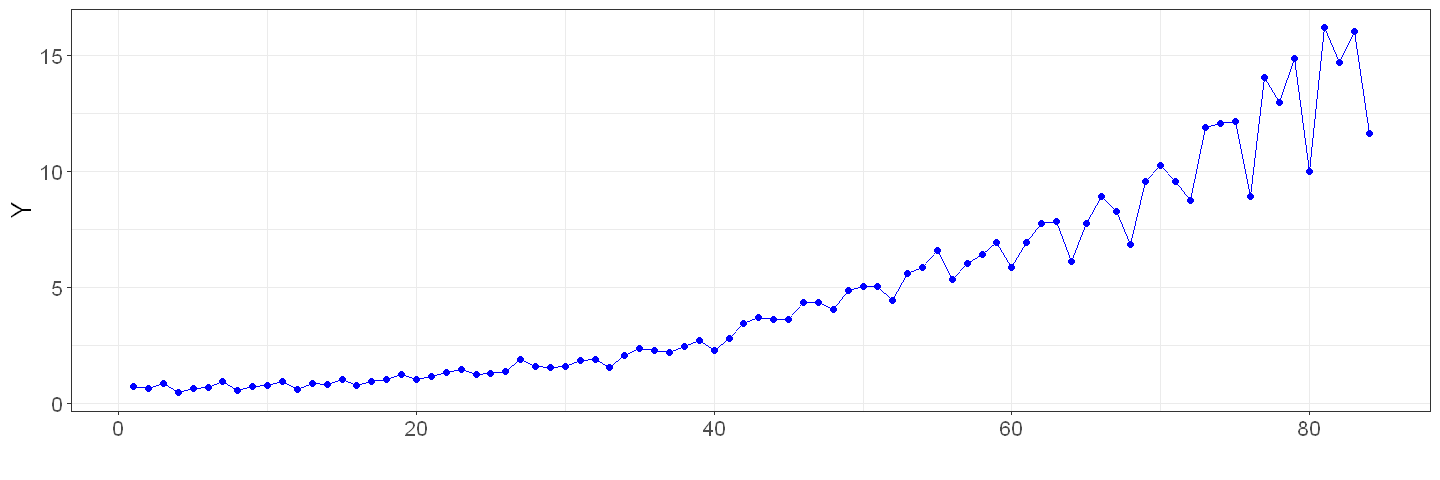

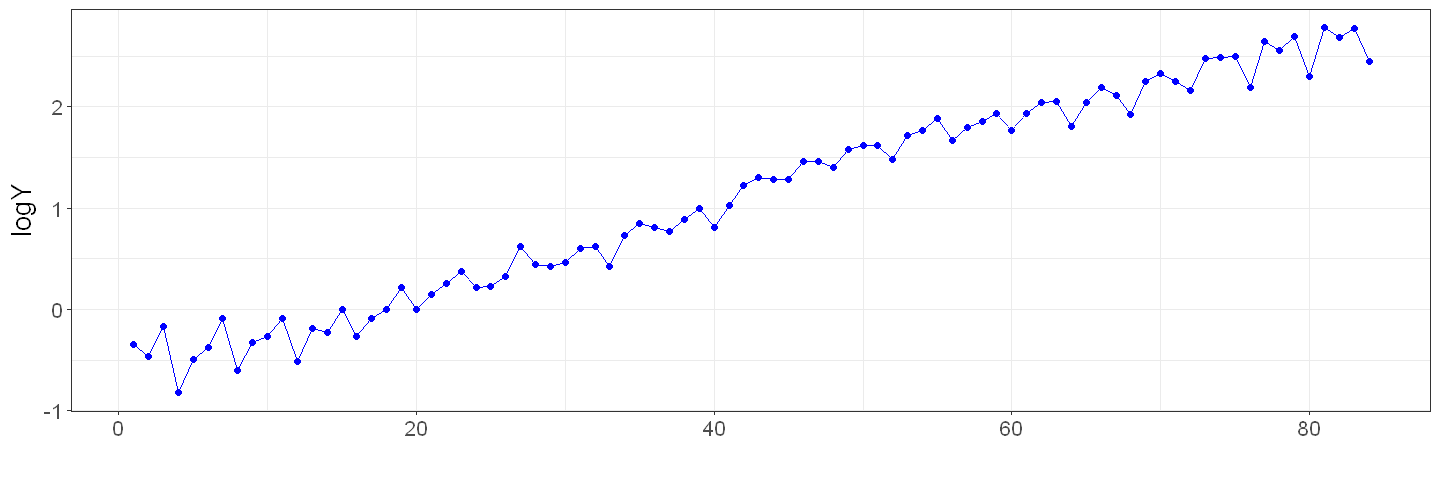

In [3]:
options(repr.plot.width=12, repr.plot.height=4)

n = length(Y)

ggplot() + 
  geom_line(aes(x=1:n, y=Y), color='blue') +
  geom_point(aes(x=1:n, y=Y), color='blue') +
  xlab('') + ylab(TeX('$Y$')) +
  theme_bw() + theme(text = element_text(size=16))

ggplot() + 
  geom_line(aes(x=1:n, y=log(Y)), color='blue') +
  geom_point(aes(x=1:n, y=log(Y)), color='blue') +
  xlab('') + ylab(TeX('$\\log Y$')) +
  theme_bw() + theme(text = element_text(size=16))

Taking the logs makes the changes within each seasonal cycle have closer sizes, suggesting it will be an appropriate transformation.

**(b)**

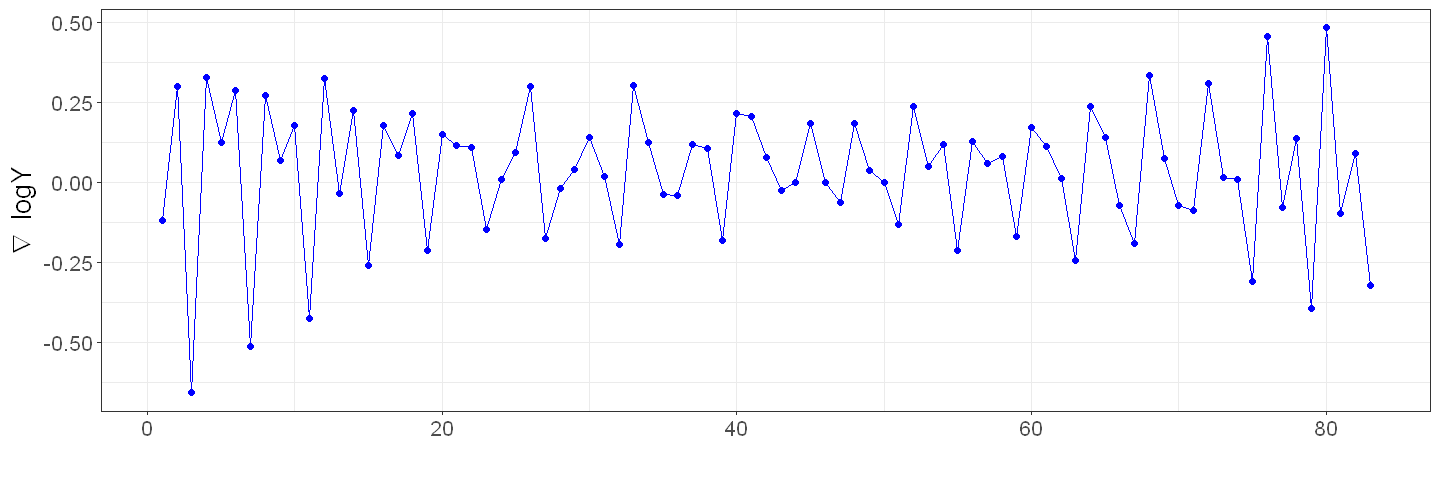

In [4]:
Z = diff(log(Y))

ggplot() + 
  geom_line(aes(x=1:length(Z), y=Z), color='blue') +
  geom_point(aes(x=1:length(Z), y=Z), color='blue') +
  xlab('') + ylab(TeX('$\\nabla \\; \\log Y$')) +
  theme_bw() + theme(text = element_text(size=16))

The growth trend is gone; series may now be stationary.

**(c)**

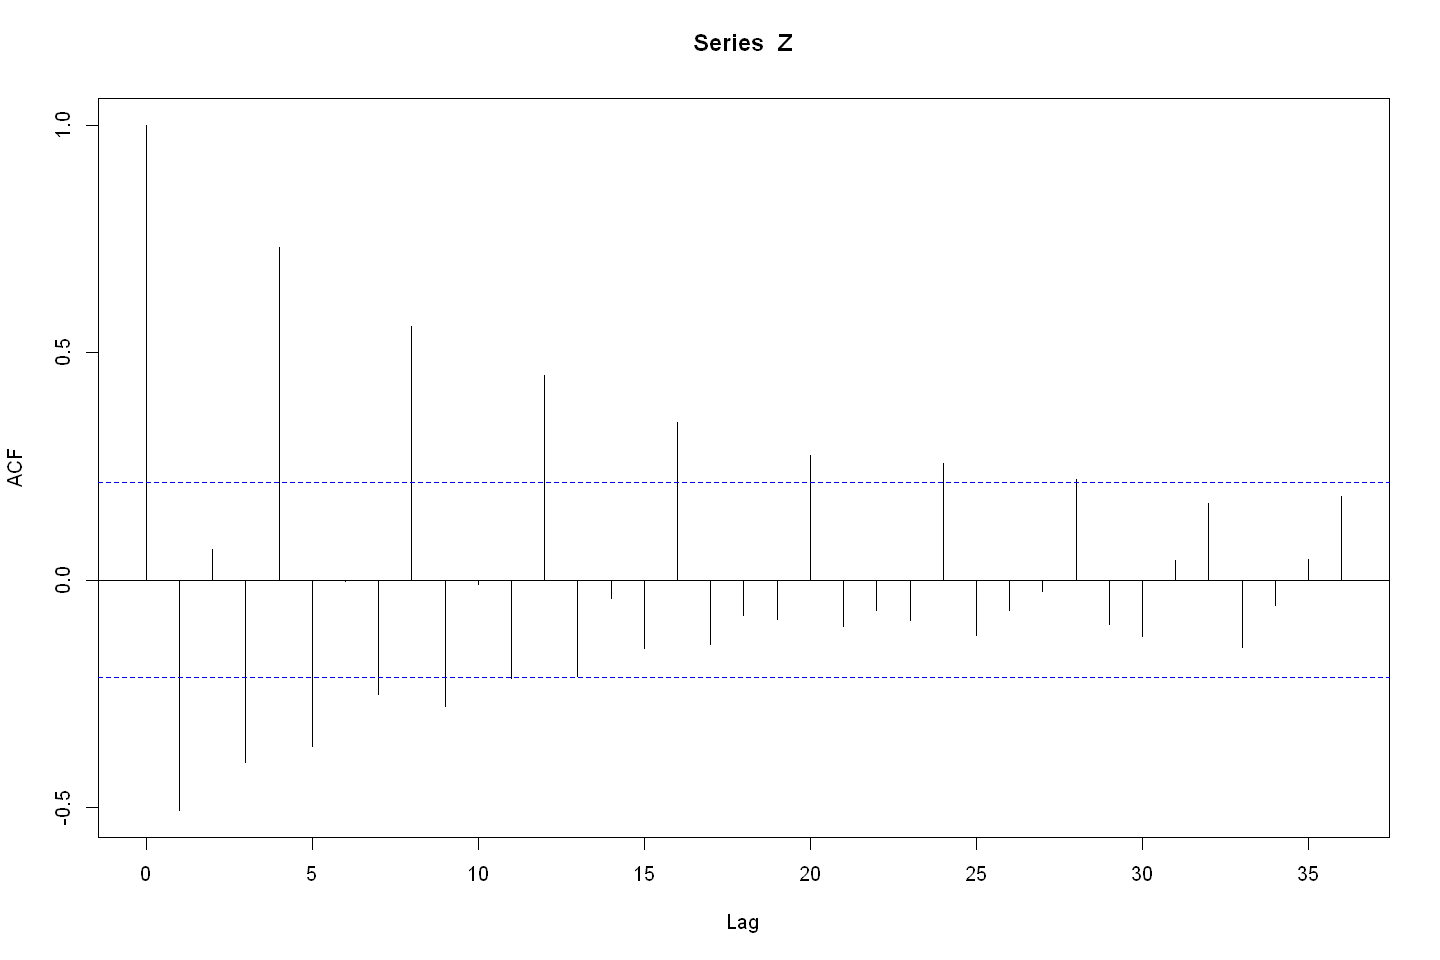

In [5]:
options(repr.plot.width=12, repr.plot.height=8)
acf(Z, plot=T, lag.max=36)

Multiple lags occcurring at every 4 periods suggest a seasonality of period 4.

**(d)**

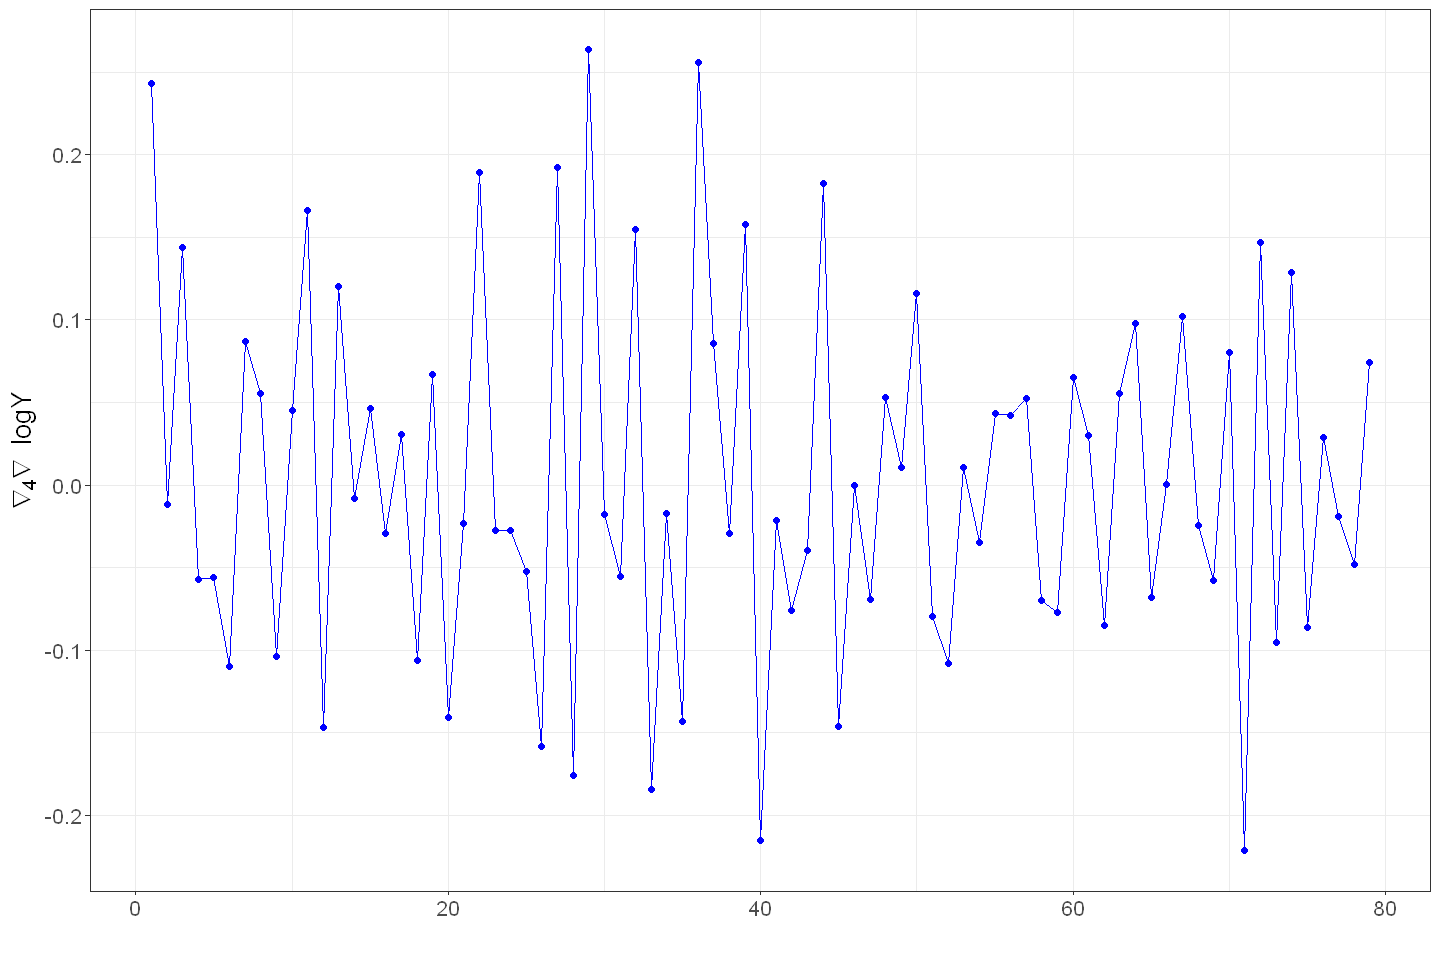

In [6]:
W = diff(Z, lag=4)

ggplot() + 
  geom_line(aes(x=1:length(W), y=W), color='blue') +
  geom_point(aes(x=1:length(W), y=W), color='blue') +
  xlab('') + ylab(TeX('$\\nabla_4 \\nabla \\; \\log Y$')) +
  theme_bw() + theme(text = element_text(size=16))

**(e)**

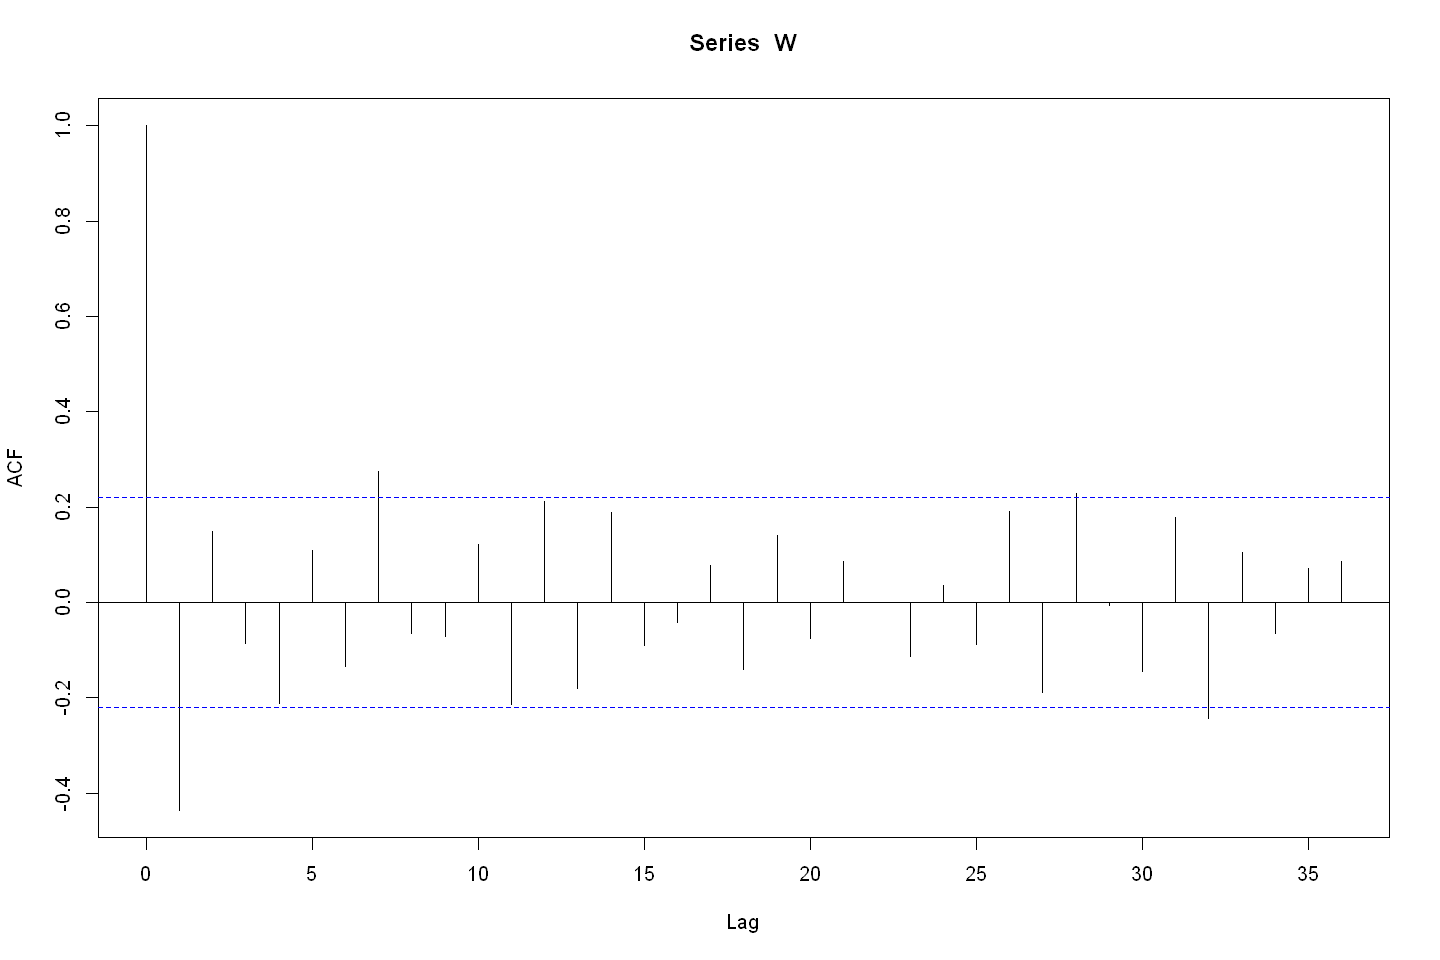

In [7]:
options(repr.plot.width=12, repr.plot.height=8)
acf(W, plot=T, lag.max=36)

A MA(1) model may be applicable to this series now.

**(f)**

In [8]:
model = arima(log(Y), order=c(0,1,1), seasonal=list(order=c(0,1,1), period=4))
model


Call:
arima(x = log(Y), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 4))

Coefficients:
          ma1     sma1
      -0.6809  -0.3146
s.e.   0.0982   0.1070

sigma^2 estimated as 0.007931:  log likelihood = 78.38,  aic = -150.75

**(g)**

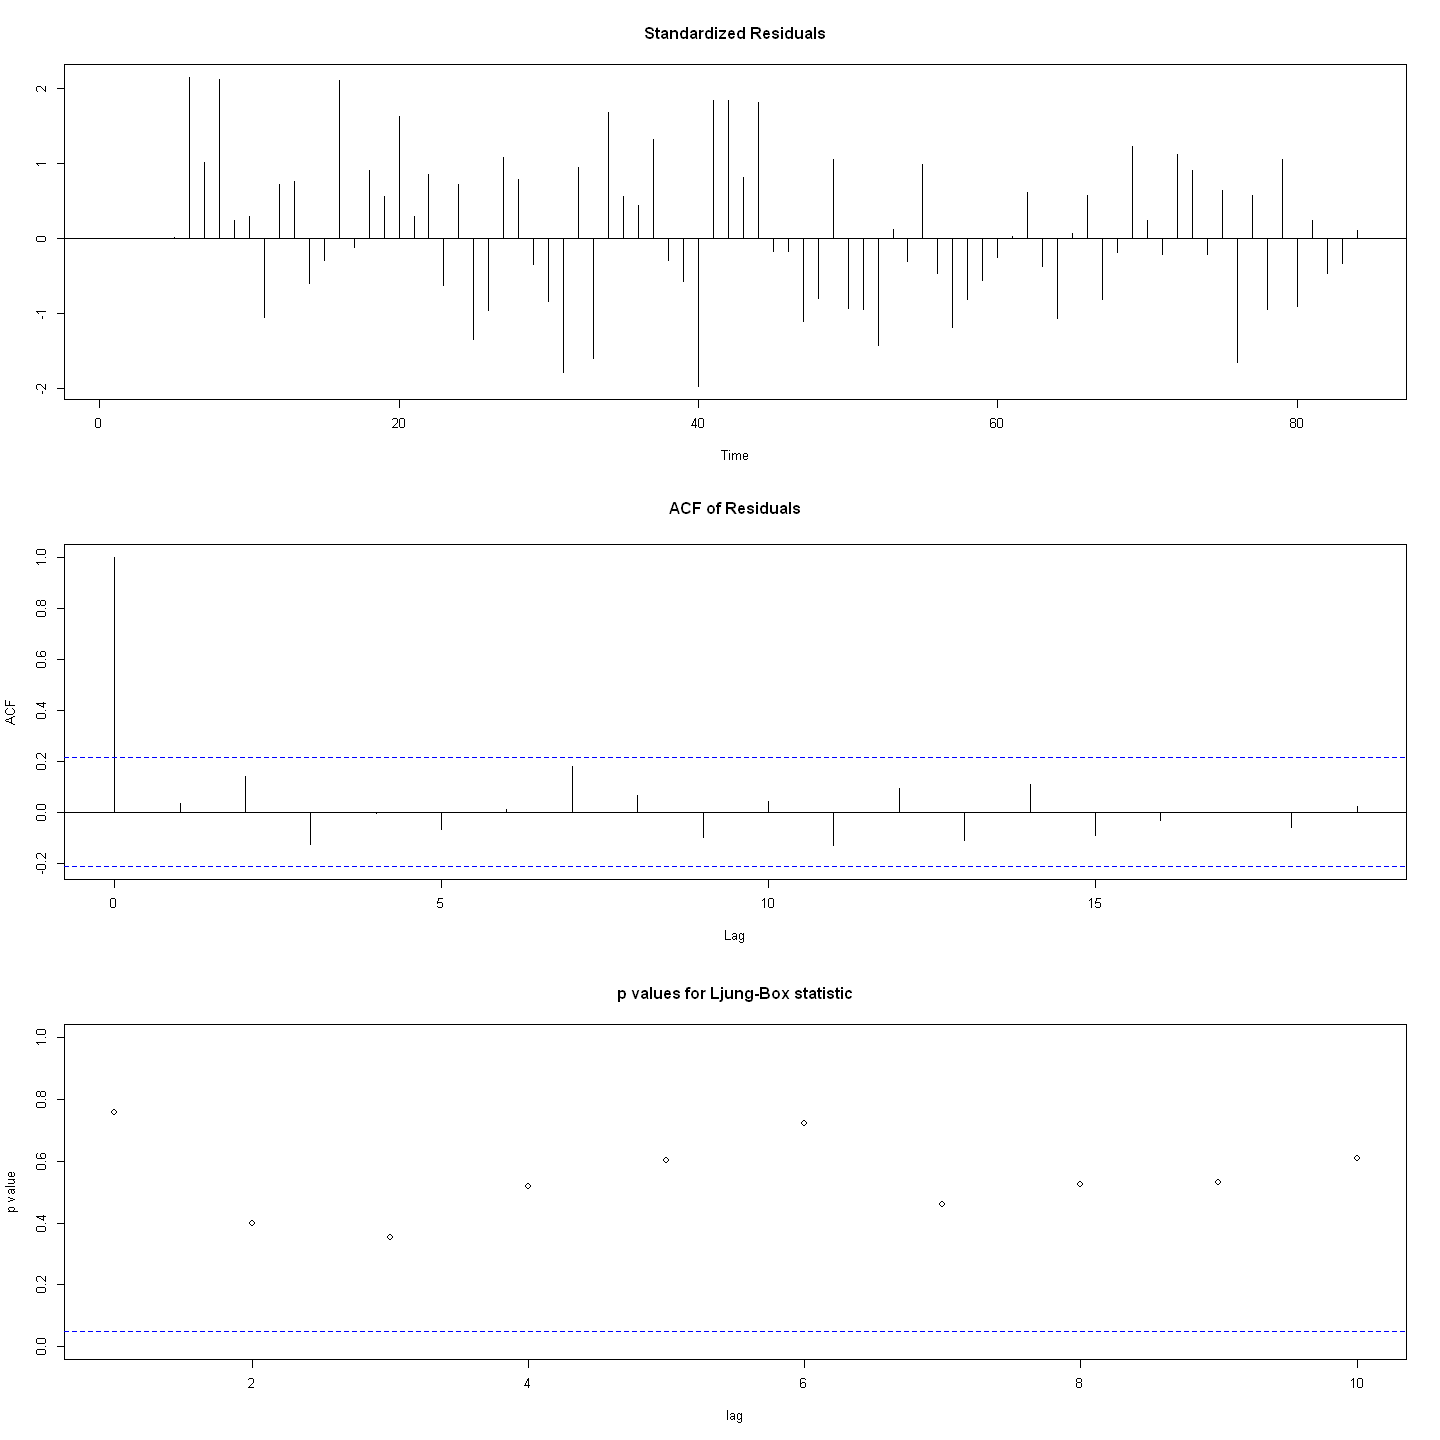

In [9]:
options(repr.plot.width=12, repr.plot.height=12)
tsdiag(model)

**(h)**

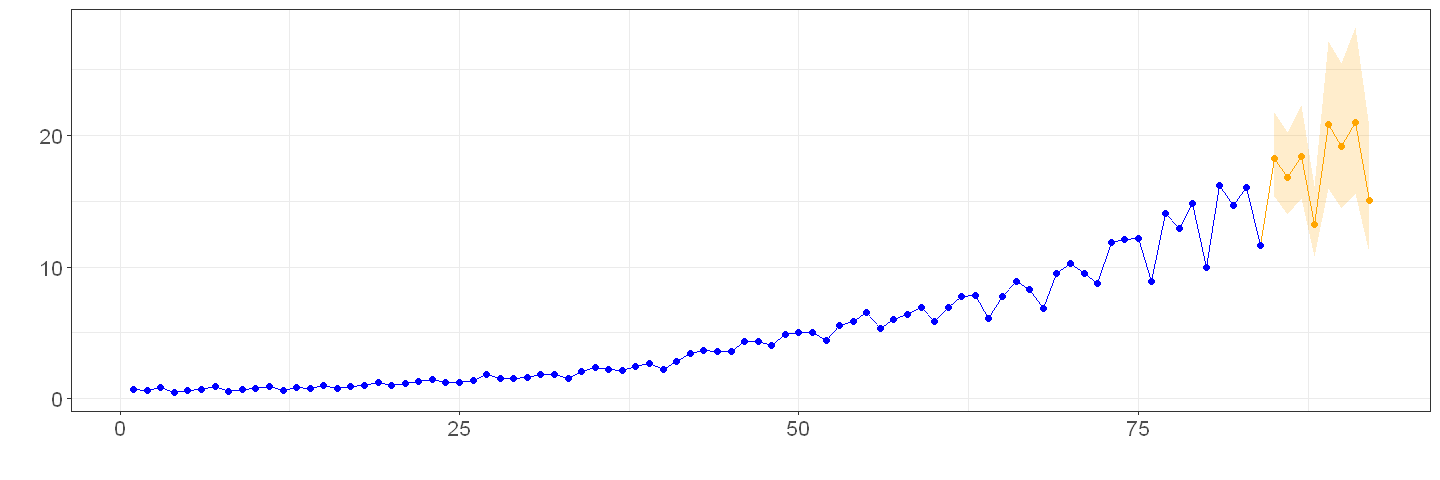

In [10]:
pred = predict(model, n.ahead=8, se.fit=TRUE)
Y_pred = pred$pred
se = pred$se
z = qnorm(0.975)

options(repr.plot.width=12, repr.plot.height=4)

m = length(Y_pred)
n = length(Y)

# Prepend last element so line is continuous
plot_data = c(log(tail(Y, n=1)), Y_pred)

ggplot() + 
  geom_line(aes(x=n:(n+m), y=exp(plot_data)), color='orange') +
  geom_point(aes(x=n:(n+m), y=exp(plot_data)), color='orange') +
  geom_line(aes(x=1:n, y=Y), color='blue') +
  geom_point(aes(x=1:n, y=Y), color='blue') +
  geom_ribbon(aes(
      x=(n+1):(n+m), 
      ymin=exp(Y_pred - z * se), 
      ymax=exp(Y_pred + z * se)
  ), fill='orange', alpha=0.2) + 
  xlab('') + ylab('') +
  theme_bw() + theme(text = element_text(size=16))

**Exercise 10.12**.  The file named `boardings` contains monthly data on the number of people who boarded transit vehicles (mostly light rail trains and city buses) in the Denver, Colorado, region for August 2000 through December 2005.

**(a)**  Produce the time series plot for these data.  Be sure to use plotting symbols that will help you assess seasonality.  Does a stationary model seem reasonable?

**(b)**  Calculate and plot the sample ACF for this series.  At which lags do you have significant autocorrelation?

**(c)**  Fit an ARMA$(0,3)\times(1,0)_{12}$ model to these data.  Assess the significance of the estimated coefficients.

**(d)**  Overfit with an ARMA$(0,4)\times(1,0)_{12}$ model.  Interpret the results.

**Solution**.

In [11]:
source('utils.R')

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: tseries

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [12]:
data <- read.table("../data/boardings.dat", header=TRUE)
data['date'] = time(zooreg(1:nrow(data), as.yearmon("2000-08"), freq = 12))

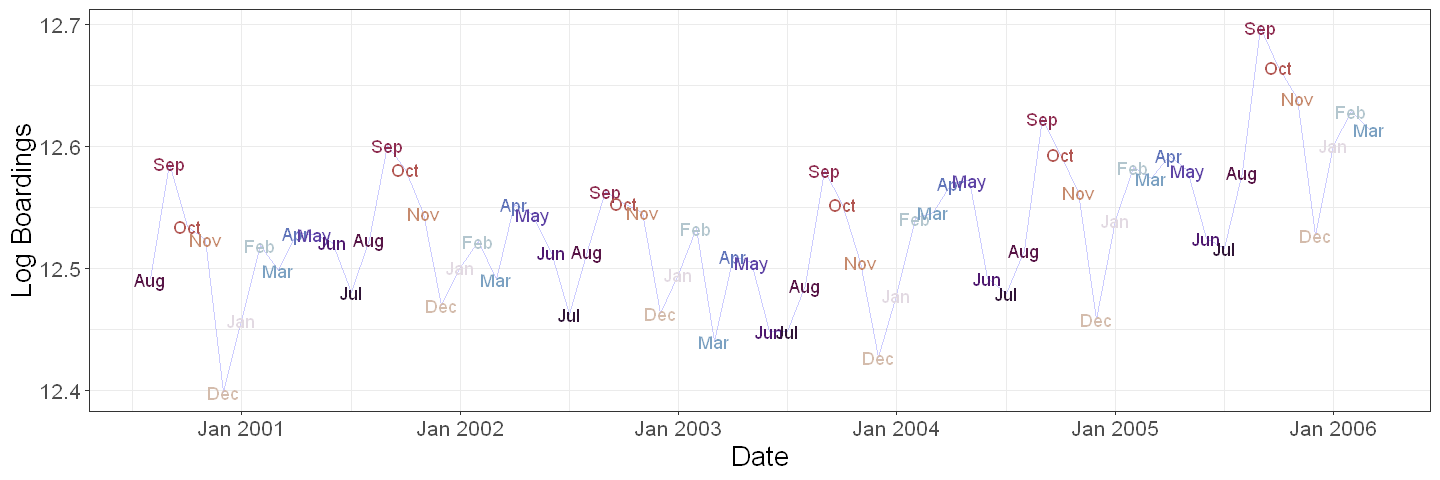

In [13]:
plot_monthly(data[['date']], data[['log.boardings']] , 'Date', 'Log Boardings')

Seasonality appears in this series. Upward trend after 2004 indicates against stationarity.

**(b)**

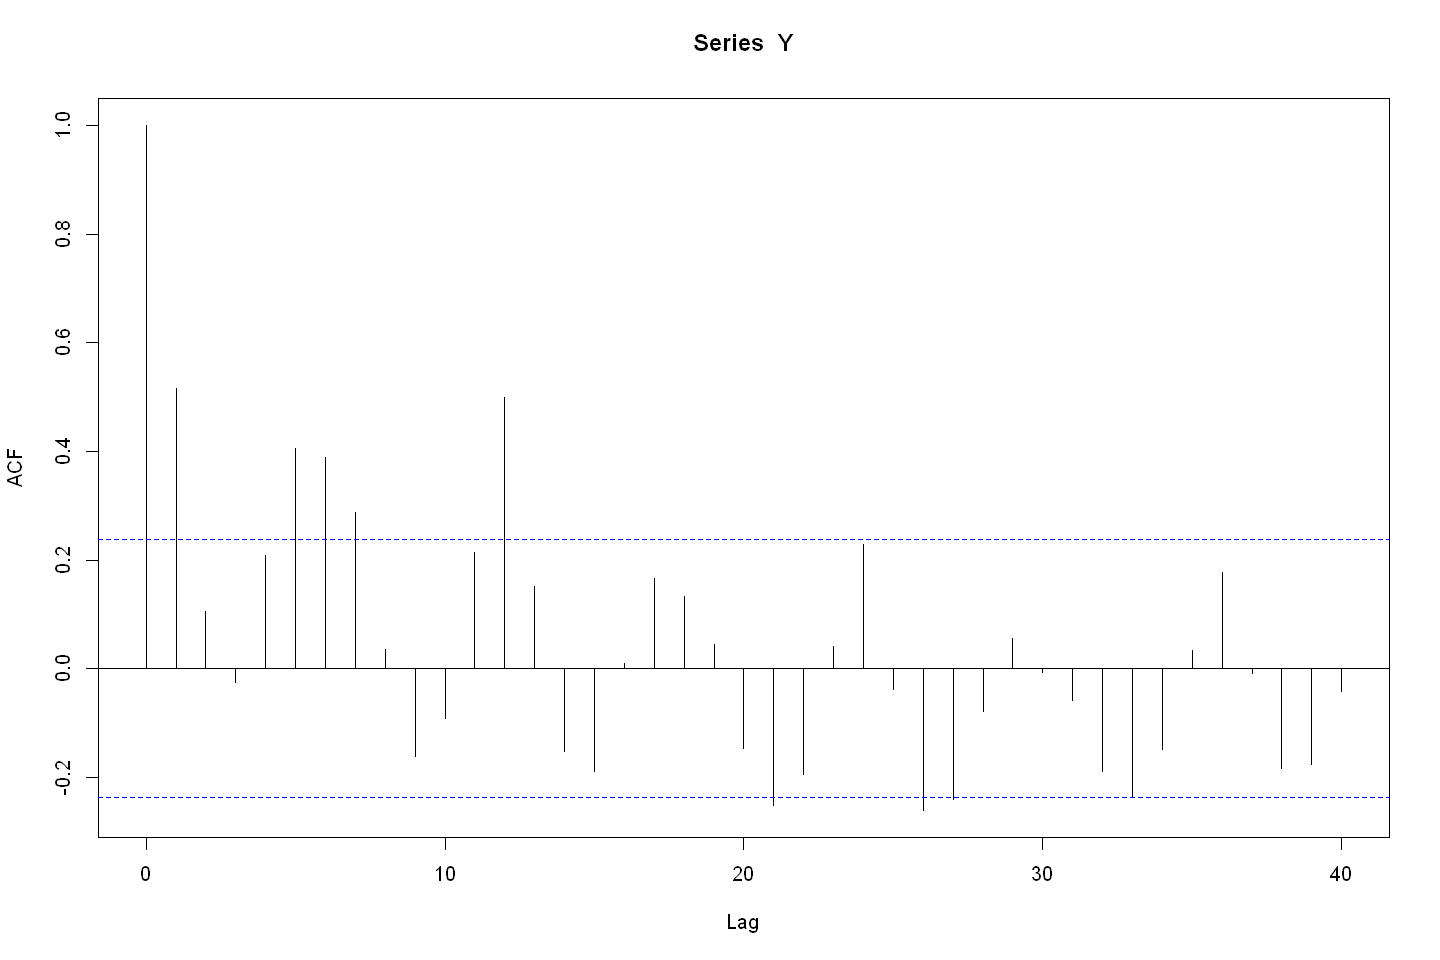

In [14]:
Y = data[['log.boardings']]

options(repr.plot.width=12, repr.plot.height=8)
acf(Y, plot=T, lag.max=40)

Significant autocorrelation occurs at lags 5, 6, and 12. This suggests seasonality of period 12.

**(c)**

In [15]:
model = arima(Y, order=c(0,0,3), seasonal=list(order=c(1,0,0), period=12))
model


Call:
arima(x = Y, order = c(0, 0, 3), seasonal = list(order = c(1, 0, 0), period = 12))

Coefficients:
         ma1     ma2     ma3    sar1  intercept
      0.7290  0.6116  0.2950  0.8776    12.5455
s.e.  0.1186  0.1172  0.1118  0.0507     0.0354

sigma^2 estimated as 0.0006543:  log likelihood = 143.54,  aic = -275.09

All coefficients are significant.

**(d)**

In [16]:
model = arima(Y, order=c(0,0,4), seasonal=list(order=c(1,0,0), period=12))
model


Call:
arima(x = Y, order = c(0, 0, 4), seasonal = list(order = c(1, 0, 0), period = 12))

Coefficients:
         ma1     ma2     ma3     ma4    sar1  intercept
      0.7276  0.6685  0.4244  0.1414  0.8918    12.5459
s.e.  0.1212  0.1327  0.1681  0.1228  0.0445     0.0419

sigma^2 estimated as 0.0006279:  log likelihood = 144.22,  aic = -274.45

The coefficient for $\theta_4$ is not significant.